In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

## Dataset Analysis

In [2]:
df=pd.read_csv(r"./phishing.csv")

In [3]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [4]:
df = df.drop(columns='Index')

In [5]:
df.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1


In [6]:
df.shape

(11054, 31)

In [7]:
print(len(df.loc[df['class'] == 1])) # 정상 웹사이트
print(len(df.loc[df['class'] == -1])) # 피싱 웹사이트

6157
4897


In [8]:
X = df.drop(columns='class')
X.head()

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,DisableRightClick,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
3,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,1,-1,1,-1,-1


In [9]:
Y = df['class']
Y = pd.DataFrame(Y)
Y.head()

,class
0,-1
1,-1
2,-1
3,1
4,1


## Feature Engineering

### Recursive Feature Elimination with Cross Validation

In [10]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
min_features_to_select = 1  # Minimum number of features to consider
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator = DecisionTreeClassifier(random_state=1234),
    step = 1,
    cv = cv,
    scoring = "f1_macro",
    min_features_to_select = min_features_to_select,
    n_jobs = 2,
)
rfecv.fit(X, Y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 18


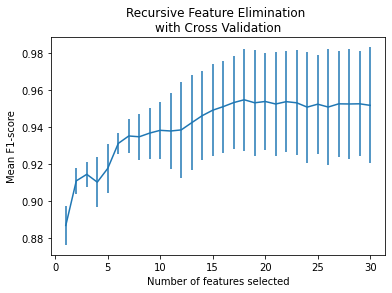

In [12]:
cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean F1-score")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith Cross Validation")
plt.savefig('RFECV result.png')
plt.show()

In [13]:
for i in range(X.shape[1]):
    print('{:<20} Selected {:<3} Rank: {:<2}'.format(X.columns[i], rfecv.support_[i], str(rfecv.ranking_[i])))

UsingIP              Selected 1   Rank: 1 
LongURL              Selected 1   Rank: 1 
ShortURL             Selected 0   Rank: 7 
Symbol@              Selected 0   Rank: 5 
Redirecting//        Selected 0   Rank: 13
PrefixSuffix-        Selected 1   Rank: 1 
SubDomains           Selected 1   Rank: 1 
HTTPS                Selected 1   Rank: 1 
DomainRegLen         Selected 1   Rank: 1 
Favicon              Selected 0   Rank: 6 
NonStdPort           Selected 0   Rank: 12
HTTPSDomainURL       Selected 0   Rank: 10
RequestURL           Selected 1   Rank: 1 
AnchorURL            Selected 1   Rank: 1 
LinksInScriptTags    Selected 1   Rank: 1 
ServerFormHandler    Selected 1   Rank: 1 
InfoEmail            Selected 1   Rank: 1 
AbnormalURL          Selected 0   Rank: 8 
WebsiteForwarding    Selected 1   Rank: 1 
StatusBarCust        Selected 0   Rank: 3 
DisableRightClick    Selected 0   Rank: 9 
UsingPopupWindow     Selected 0   Rank: 2 
IframeRedirection    Selected 0   Rank: 11
AgeofDomain

### Variance of Feature

In [14]:
variances = []
for column in df:
    variances += [[column, (df[column].var())]]
variances.sort(key = lambda x:x[1])

In [15]:
variances

[['WebsiteForwarding', 0.10232639647278342],
 ['DisableRightClick', 0.16484313920731875],
 ['LinksPointingToPage', 0.3248267541830524],
 ['IframeRedirection', 0.3327063505768844],
 ['StatusBarCust', 0.4192764598147353],
 ['Redirecting//', 0.45002270505108116],
 ['ShortURL', 0.4543085831934734],
 ['PrefixSuffix-', 0.459908360348241],
 ['NonStdPort', 0.4697043773055857],
 ['GoogleIndex', 0.47941075592316507],
 ['StatsReport', 0.48201871434420257],
 ['AbnormalURL', 0.5023914006384614],
 ['Symbol@', 0.5092605195444905],
 ['AnchorURL', 0.5113910916023277],
 ['HTTPSDomainURL', 0.5441127442099146],
 ['ServerFormHandler', 0.5763355421042663],
 ['LinksInScriptTags', 0.583593890456363],
 ['LongURL', 0.5867139136234639],
 ['InfoEmail', 0.5958275840908255],
 ['Favicon', 0.6049786829847236],
 ['UsingPopupWindow', 0.6238549852019902],
 ['SubDomains', 0.6682939615695909],
 ['WebsiteTraffic', 0.6850544732157657],
 ['PageRank', 0.7661753620249948],
 ['HTTPS', 0.8314813205469035],
 ['DNSRecording', 0.85

### Feature Selection

In [16]:
X.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport'],
      dtype='object')

In [17]:
rfecv.support_

array([ True,  True, False, False, False,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True, False])

In [18]:
X = X.loc[:, rfecv.support_]
X.columns

Index(['UsingIP', 'LongURL', 'PrefixSuffix-', 'SubDomains', 'HTTPS',
       'DomainRegLen', 'RequestURL', 'AnchorURL', 'LinksInScriptTags',
       'ServerFormHandler', 'InfoEmail', 'WebsiteForwarding', 'AgeofDomain',
       'DNSRecording', 'WebsiteTraffic', 'PageRank', 'GoogleIndex',
       'LinksPointingToPage'],
      dtype='object')

## Model Training  & Testing

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [20]:
modelNames = []
accList = []
precList = []
recList = []
f1List = []

def storeResult(modelName, accuracy, precision, recall, f1_score):
  modelNames.append(modelName)
  accList.append(round(accuracy, 4))
  precList.append(round(precision, 4))
  recList.append(round(recall, 4))
  f1List.append(round(f1_score, 4))

In [21]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=1234)
train_Y = train_Y.replace({1:1, -1:0})
test_Y = test_Y.replace({1:1, -1:0})
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(8843, 18)
(2211, 18)
(8843, 1)
(2211, 1)


### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logReg = LogisticRegression(random_state = 1234).fit(train_X, train_Y)
logReg_predict= logReg.predict(test_X)
storeResult('Logistic Regression', 
            accuracy_score(logReg_predict, test_Y), 
            precision_score(logReg_predict, test_Y), 
            recall_score(logReg_predict, test_Y), 
            f1_score(logReg_predict, test_Y))

In [24]:
print(classification_report(test_Y, logReg_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9386    0.8975    0.9176       937
           1     0.9270    0.9568    0.9417      1274

    accuracy                         0.9317      2211
   macro avg     0.9328    0.9272    0.9296      2211
weighted avg     0.9319    0.9317    0.9315      2211



### K-Nearest Neighbors Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(train_X, train_Y)
knn_predict = knn.predict(test_X)
storeResult('K-Nearest Neighbors',
            accuracy_score(knn_predict, test_Y), 
            precision_score(knn_predict, test_Y), 
            recall_score(knn_predict, test_Y), 
            f1_score(knn_predict, test_Y))

In [27]:
print(classification_report(test_Y, knn_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9464    0.9413    0.9438       937
           1     0.9570    0.9608    0.9589      1274

    accuracy                         0.9525      2211
   macro avg     0.9517    0.9510    0.9513      2211
weighted avg     0.9525    0.9525    0.9525      2211



### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dTree = DecisionTreeClassifier(random_state = 1234).fit(train_X, train_Y)
dTree_predict = dTree.predict(test_X)
storeResult('Decision Tree', 
            accuracy_score(dTree_predict, test_Y), 
            precision_score(dTree_predict, test_Y), 
            recall_score(dTree_predict, test_Y), 
            f1_score(dTree_predict, test_Y))

In [30]:
print(classification_report(test_Y, dTree_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9565    0.9616    0.9590       937
           1     0.9716    0.9678    0.9697      1274

    accuracy                         0.9652      2211
   macro avg     0.9641    0.9647    0.9644      2211
weighted avg     0.9652    0.9652    0.9652      2211



### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(random_state = 1234).fit(train_X, train_Y)
rfc_predict = rfc.predict(test_X)
storeResult('Random Forest', 
            accuracy_score(rfc_predict, test_Y), 
            precision_score(rfc_predict, test_Y), 
            recall_score(rfc_predict, test_Y), 
            f1_score(rfc_predict, test_Y))

In [33]:
print(classification_report(test_Y, rfc_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9772    0.9616    0.9693       937
           1     0.9721    0.9835    0.9778      1274

    accuracy                         0.9742      2211
   macro avg     0.9746    0.9725    0.9735      2211
weighted avg     0.9743    0.9742    0.9742      2211



### Support Vector Classifier

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC(random_state = 1234, probability=True).fit(train_X, train_Y)
svc_predict = svc.predict(test_X)
storeResult('Support Vector', 
            accuracy_score(svc_predict, test_Y), 
            precision_score(svc_predict, test_Y), 
            recall_score(svc_predict, test_Y), 
            f1_score(svc_predict, test_Y))

In [36]:
print(classification_report(test_Y, svc_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9564    0.9370    0.9466       937
           1     0.9544    0.9686    0.9614      1274

    accuracy                         0.9552      2211
   macro avg     0.9554    0.9528    0.9540      2211
weighted avg     0.9552    0.9552    0.9552      2211



### AdaBoost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier

In [38]:
adc = AdaBoostClassifier(random_state = 1234, n_estimators = 5, learning_rate = 1).fit(train_X, train_Y)
adc_predict = adc.predict(test_X)
storeResult('Adaboost', 
            accuracy_score(adc_predict, test_Y), 
            precision_score(adc_predict, test_Y), 
            recall_score(adc_predict, test_Y), 
            f1_score(adc_predict, test_Y))

In [39]:
print(classification_report(test_Y, adc_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9141    0.9082    0.9111       937
           1     0.9328    0.9372    0.9350      1274

    accuracy                         0.9249      2211
   macro avg     0.9234    0.9227    0.9231      2211
weighted avg     0.9249    0.9249    0.9249      2211



### XGBoost Classifier

In [40]:
from xgboost import XGBClassifier

In [41]:
xgb = XGBClassifier(random_state = 1234).fit(train_X, train_Y)
xgb_predict = xgb.predict(test_X)
storeResult('XGBoost', 
            accuracy_score(xgb_predict, test_Y), 
            precision_score(xgb_predict, test_Y), 
            recall_score(xgb_predict, test_Y), 
            f1_score(xgb_predict, test_Y))

In [42]:
print(classification_report(test_Y, xgb_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9729    0.9594    0.9661       937
           1     0.9705    0.9804    0.9754      1274

    accuracy                         0.9715      2211
   macro avg     0.9717    0.9699    0.9708      2211
weighted avg     0.9715    0.9715    0.9715      2211



### Gradient Boosting Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [44]:
gbc = GradientBoostingClassifier(random_state = 1234).fit(train_X, train_Y)
gbc_predict = gbc.predict(test_X)
storeResult('Gradient Boosting',
            accuracy_score(gbc_predict, test_Y), 
            precision_score(gbc_predict, test_Y), 
            recall_score(gbc_predict, test_Y), 
            f1_score(gbc_predict, test_Y))

In [45]:
print(classification_report(test_Y, gbc_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9575    0.9370    0.9471       937
           1     0.9544    0.9694    0.9618      1274

    accuracy                         0.9557      2211
   macro avg     0.9559    0.9532    0.9545      2211
weighted avg     0.9557    0.9557    0.9556      2211



### Performance Comparison

In [46]:
performanceList = pd.DataFrame({
    'Model Name': modelNames,
    'Accuracy': accList,
    'Precison': precList,
    'Recall': recList,
    'F1-score': f1List,
})
performanceList

,Model Name,Accuracy,Precison,Recall,F1-score
0,Logistic Regression,0.9317,0.9568,0.9270,0.9417
1,K-Nearest Neighbors,0.9525,0.9608,0.9570,0.9589
2,Decision Tree,0.9652,0.9678,0.9716,0.9697
3,Random Forest,0.9742,0.9835,0.9721,0.9778
4,Support Vector,0.9552,0.9686,0.9544,0.9614
5,Adaboost,0.9249,0.9372,0.9328,0.9350
6,XGBoost,0.9715,0.9804,0.9705,0.9754
7,Gradient Boosting,0.9557,0.9694,0.9544,0.9618


### Voting Classifier

#### Model predicted to have the best performance

In [47]:
from sklearn.ensemble import VotingClassifier

In [48]:
vc0 = VotingClassifier(estimators=[
        ('m1', dTree), ('m2', rfc), ('m3', xgb)], voting='soft').fit(train_X, train_Y)
vc0_predict = vc0.predict(test_X)
print('Accuracy: ' + str(accuracy_score(vc0_predict, test_Y)))
print('Precision: ' + str(precision_score(vc0_predict, test_Y)))
print('Recall: ' + str(recall_score(vc0_predict, test_Y)))
print('F1-score: ' + str(f1_score(vc0_predict, test_Y)))

Accuracy: 0.9724106739032112
Precision: 0.978806907378336
Recall: 0.9734582357533177
F1-score: 0.9761252446183953


#### Best performing models

In [49]:
vc1 = VotingClassifier(estimators=[
        ('m1', rfc), ('m2', adc)], voting='soft').fit(train_X, train_Y)
vc1_predict = vc1.predict(test_X)
storeResult('Voting Classifier\n(RFC + ADB)', 
            accuracy_score(vc1_predict, test_Y), 
            precision_score(vc1_predict, test_Y), 
            recall_score(vc1_predict, test_Y), 
            f1_score(vc1_predict, test_Y))

In [50]:
print(classification_report(test_Y, vc1_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9847    0.9648    0.9747       937
           1     0.9745    0.9890    0.9817      1274

    accuracy                         0.9787      2211
   macro avg     0.9796    0.9769    0.9782      2211
weighted avg     0.9788    0.9787    0.9787      2211



Text(0.5, 1.0, 'Confusion matrix')

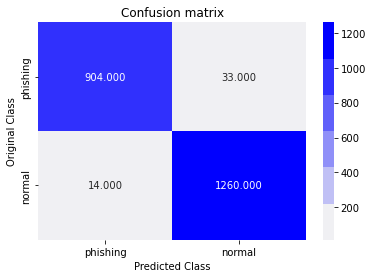

In [51]:
C = confusion_matrix(test_Y, vc1_predict)
plt.figure(figsize=(6,4))
labels = ['phishing', 'normal']
cmap = sns.light_palette("blue")
sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix")

In [52]:
vc2 = VotingClassifier(estimators=[
        ('m1', logReg), ('m2', knn), ('m3', dTree), ('m4', rfc), ('m5', xgb)], voting='soft').fit(train_X, train_Y)
vc2_predict = vc2.predict(test_X)
storeResult('Voting Classifier\n(LR + KNN + DT + RFC + XGB)',
            accuracy_score(vc2_predict, test_Y), 
            precision_score(vc2_predict, test_Y), 
            recall_score(vc2_predict, test_Y), 
            f1_score(vc2_predict, test_Y))

In [53]:
print(classification_report(test_Y, vc2_predict, digits = 4))

              precision    recall  f1-score   support

           0     0.9836    0.9626    0.9730       937
           1     0.9730    0.9882    0.9805      1274

    accuracy                         0.9774      2211
   macro avg     0.9783    0.9754    0.9768      2211
weighted avg     0.9775    0.9774    0.9774      2211



Text(0.5, 1.0, 'Confusion matrix')

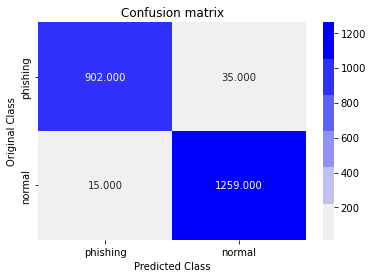

In [54]:
C = confusion_matrix(test_Y, vc2_predict)
plt.figure(figsize=(6,4))
labels = ['phishing', 'normal']
cmap = sns.light_palette("blue")
sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix")

### Graph

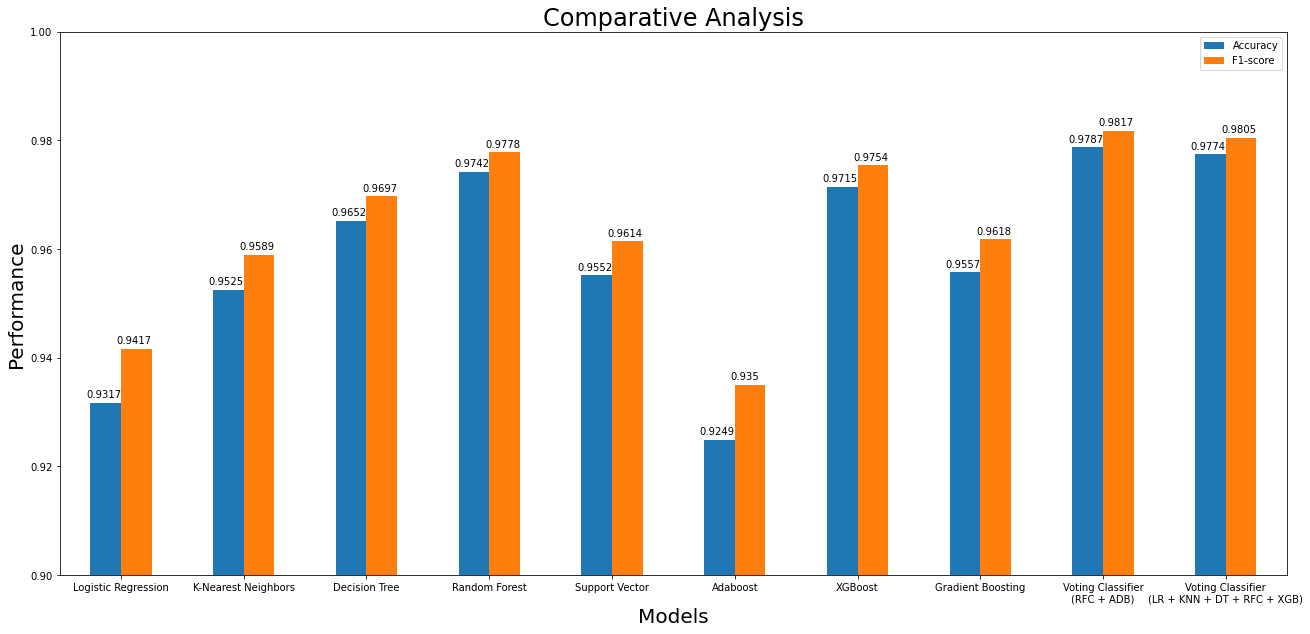

In [55]:
df = pd.DataFrame({
    'Model Name': modelNames,
    'Accuracy': accList,
    'F1-score': f1List,
})
df.set_index('Model Name', inplace=True)

fig, ax = plt.subplots(figsize = (22, 10))
df.plot(kind = 'bar', ax = ax)
ax.set_xticklabels(df.index, rotation = 0)
ax.set_ylim([0.9, 1])
ax.set_yticks([0.9, 0.92, 0.94, 0.96, 0.98, 1])
ax.set_xlabel('Models', fontsize=20)
ax.set_ylabel('Performance', fontsize=20)
ax.set_title('Comparative Analysis', fontsize=24)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() - p.get_width() * 0.14, p.get_height() * 1.001))
plt.show()
fig.savefig('model performance.png', bbox_inches='tight')

### Appendix : Model Combination Test

In [56]:
from itertools import combinations

In [57]:
models = [logReg, knn, dTree, rfc, svc, adc, xgb, gbc]

In [58]:
comb = combinations(models, 5)
accBest = 0
accIndex = 0
f1Best = 0
f1Index = 0

for i in list(comb):
    vc = VotingClassifier(estimators=[
        ('m1', i[0]), ('m2', i[1]), ('m3', i[2]), ('m4', i[3]), ('m5', i[4])], voting='soft').fit(train_X, train_Y)
    vc_predict = vc.predict(test_X)
    acc = accuracy_score(test_Y, vc_predict)
    if acc > accBest:
        accBest = acc
        accIndex = i
    f1 = f1_score(test_Y, vc_predict)
    if f1 > f1Best:
        f1Best = f1
        f1Index = i

In [59]:
print(accBest)
print(accIndex)
print(f1Best)
print(f1Index)

0.9773857982813207
(LogisticRegression(random_state=1234), KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(random_state=1234), RandomForestClassifier(random_state=1234), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...))
0.9805295950155763
(LogisticRegression(random_state=1234), 

In [60]:
comb = combinations(models, 4)
accBest = 0
accIndex = 0
f1Best = 0
f1Index = 0

for i in list(comb):
    vc = VotingClassifier(estimators=[
        ('m1', i[0]), ('m2', i[1]), ('m3', i[2]), ('m4', i[3])], voting='soft').fit(train_X, train_Y)
    vc_predict = vc.predict(test_X)
    acc = accuracy_score(test_Y, vc_predict)
    if acc > accBest:
        accBest = acc
        accIndex = i
    f1 = f1_score(test_Y, vc_predict)
    if f1 > f1Best:
        f1Best = f1
        f1Index = i

In [61]:
print(accBest)
print(accIndex)
print(f1Best)
print(f1Index)

0.9769335142469471
(LogisticRegression(random_state=1234), KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(random_state=1234), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1234, ...))
0.9801479174776178
(LogisticRegression(random_state=1234), DecisionTreeClassifier(random_state=1234), 

In [62]:
comb = combinations(models, 3)
accBest = 0
accIndex = 0
f1Best = 0
f1Index = 0

for i in list(comb):
    vc = VotingClassifier(estimators=[
        ('m1', i[0]), ('m2', i[1]), ('m3', i[2])], voting='soft').fit(train_X, train_Y)
    vc_predict = vc.predict(test_X)
    acc = accuracy_score(test_Y, vc_predict)
    if acc > accBest:
        accBest = acc
        accIndex = i
    f1 = f1_score(test_Y, vc_predict)
    if f1 > f1Best:
        f1Best = f1
        f1Index = i

In [63]:
print(accBest)
print(accIndex)
print(f1Best)
print(f1Index)

0.9764812302125735
(LogisticRegression(random_state=1234), DecisionTreeClassifier(random_state=1234), RandomForestClassifier(random_state=1234))
0.9797665369649805
(LogisticRegression(random_state=1234), DecisionTreeClassifier(random_state=1234), RandomForestClassifier(random_state=1234))


In [64]:
comb = combinations(models, 2)
accBest = 0
accIndex = 0
f1Best = 0
f1Index = 0

for i in list(comb):
    vc = VotingClassifier(estimators=[
        ('m1', i[0]), ('m2', i[1])], voting='soft').fit(train_X, train_Y)
    vc_predict = vc.predict(test_X)
    acc = accuracy_score(test_Y, vc_predict)
    if acc > accBest:
        accBest = acc
        accIndex = i
    f1 = f1_score(test_Y, vc_predict)
    if f1 > f1Best:
        f1Best = f1
        f1Index = i

In [65]:
print(accBest)
print(accIndex)
print(f1Best)
print(f1Index)

0.9787426503844414
(RandomForestClassifier(random_state=1234), AdaBoostClassifier(learning_rate=1, n_estimators=5, random_state=1234))
0.9816906895208415
(RandomForestClassifier(random_state=1234), AdaBoostClassifier(learning_rate=1, n_estimators=5, random_state=1234))
